In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import ast
from gensim.models import Word2Vec
pd.options.mode.chained_assignment = None

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/tristanmoser/Files/Coding/Machine_Learning/Project/ted_main.csv")

In [3]:
len(data['main_speaker'].unique())

2156

In [4]:
data.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110


## Ratings

In [5]:
data['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [6]:
ratings = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
           'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
           'Obnoxious', 'Inspiring']

In [7]:
rate = []
def parse(x):
    for ll in range(len(data)):
        splitting = data['ratings'][ll].split(x)
        splitting2 = splitting[1].split(':')
        splitting3 = splitting2[1].split(" ")
        splitting4 = splitting3[1].split("}")
        rate.append(splitting4[0])
        series = pd.Series(rate)
        data[x] = series

In [8]:
for rating in ratings:
    parse(rating)
    rate.clear()

In [9]:
data[ratings].head()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


## Tags

In [10]:
data['tags'].head()

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
Name: tags, dtype: object

In [12]:
data['tags'][9]

"['Christianity', 'God', 'culture', 'happiness', 'leadership', 'motivation', 'philanthropy', 'religion']"

In [13]:
ast.literal_eval(data['tags'][9])

['Christianity',
 'God',
 'culture',
 'happiness',
 'leadership',
 'motivation',
 'philanthropy',
 'religion']

In [14]:
destring = []
for number in range(len(data)):
    destring.append(ast.literal_eval(data['tags'][number]))
data['Tags'] = pd.Series(destring)

In [15]:
data['Tags'][9]

['Christianity',
 'God',
 'culture',
 'happiness',
 'leadership',
 'motivation',
 'philanthropy',
 'religion']

In [16]:
data['Tags'][9][0]

'Christianity'

In [17]:
data['Tags'][9].count("Christianity")

1

In [18]:
all_tags = []
for items in data['Tags']:
    all_tags.extend(items)

In [ ]:
#simplify = {"children":"family","creativity":'','culture':'',"dance":'', "education":'', "parenting":"family",
#            "teaching":'education','alternative energy':'','cars':'','climate change': 'environment',
#            'global issues':'','science':'',}

In [19]:
all_tags = pd.Series(all_tags)
print(len(all_tags.unique()))
unique = all_tags.unique()

416


In [ ]:
#This will create a column for each tag indicating that the talk has that tag

"""pd.options.mode.chained_assignment = None
for tags in unique:
    data[tags+'_tag'] = 0
    for item in range(len(data['Tags'])):
        if data['Tags'][item].count(tags) >0:
            data[tags+'_tag'][item] = 1"""

### Word2Vec

In [24]:
model = Word2Vec(destring, min_count=1)

In [25]:
print(model)

Word2Vec(vocab=416, size=100, alpha=0.025)


In [26]:
words = list(model.wv.vocab)
print(words)

['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching', 'alternative energy', 'cars', 'climate change', 'environment', 'global issues', 'science', 'sustainability', 'technology', 'computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'MacArthur grant', 'activism', 'business', 'cities', 'green', 'inequality', 'politics', 'pollution', 'Africa', 'Asia', 'Google', 'demo', 'economics', 'global development', 'health', 'math', 'statistics', 'visualizations', 'goal-setting', 'motivation', 'potential', 'psychology', 'Christianity', 'God', 'atheism', 'comedy', 'humor', 'religion', 'storytelling', 'architecture', 'collaboration', 'design', 'library', 'TED Brain Trust', 'brain', 'cognitive science', 'consciousness', 'evolution', 'philosophy', 'happiness', 'leadership', 'philanthropy', 'disaster relief', 'invention', 'open-source', 'TED Prize', 'art', 'film', 'movies', 'peace', 'social change', 'disease', 'ebola', 'e

In [31]:
print(model['children'])

[-1.47632565e-02 -6.26035780e-03  1.39420601e-02  2.70768497e-02
  3.29933241e-02  1.79717522e-02 -5.56798503e-02 -4.33527455e-02
 -8.60321894e-02  1.31388262e-01 -1.11383554e-02  1.52116520e-02
 -8.00532475e-03  3.41841504e-02 -6.04628809e-02 -1.10232235e-04
  6.25275597e-02 -1.87898055e-02 -3.62795405e-02 -2.13626418e-02
 -6.07773438e-02 -2.06827894e-02 -8.04111063e-02 -1.30152246e-02
  2.47172285e-02  7.86831416e-03  1.95527766e-02  3.22833732e-02
 -2.29797922e-02 -4.03701626e-02 -4.99497987e-02 -2.79581901e-02
  3.92840169e-02 -1.41180485e-01 -1.08619500e-02 -2.62664426e-02
 -1.43445868e-04 -3.47670019e-02 -5.15723741e-03  3.50273848e-02
 -9.73240472e-03 -3.28075635e-04  3.01204785e-03  2.36397125e-02
  5.72291054e-02  4.92372736e-03  5.88373318e-02 -4.66493629e-02
  1.90316746e-03  1.87886897e-02  1.14075076e-02  2.75493367e-04
  5.47456788e-03 -3.07044107e-02  1.23191737e-02  1.89287271e-02
  7.30010169e-03  4.81507741e-02  1.82234719e-02 -3.68705653e-02
  3.54855619e-02 -1.63015

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [28]:
model.save('model.bin')

In [92]:
model.most_similar('children')

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('culture', 0.9998072385787964),
 ('communication', 0.9998066425323486),
 ('brain', 0.9997845888137817),
 ('identity', 0.999779999256134),
 ('journalism', 0.9997788071632385),
 ('humanity', 0.9997780919075012),
 ('Middle East', 0.9997696876525879),
 ('community', 0.9997666478157043),
 ('religion', 0.9997625946998596),
 ('business', 0.9997618794441223)]

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


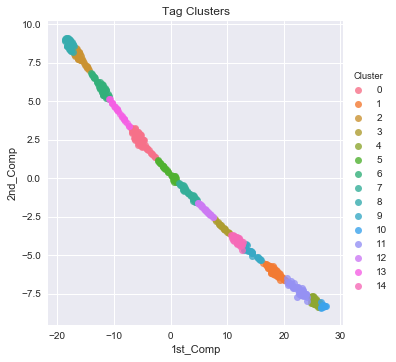

In [61]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=5000, random_state=23,learning_rate=1000)
new_values = tsne_model.fit_transform(tokens)

kmeans = KMeans(n_clusters=15)
kmeans.fit(tokens)
clusters = kmeans.predict(tokens)

df_tsne = pd.DataFrame(new_values, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Cluster'] = clusters

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Cluster', fit_reg=False)
plt.title("Tag Clusters")

In [83]:
convert = {labels[word]: clusters[word] for word in range(len(labels))}

## Related Talks

In [100]:
data['related_talks'][0]

'[{\'id\': 865, \'hero\': \'https://pe.tedcdn.com/images/ted/172559_800x600.jpg\', \'speaker\': \'Ken Robinson\', \'title\': \'Bring on the learning revolution!\', \'duration\': 1008, \'slug\': \'sir_ken_robinson_bring_on_the_revolution\', \'viewed_count\': 7266103}, {\'id\': 1738, \'hero\': \'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg\', \'speaker\': \'Ken Robinson\', \'title\': "How to escape education\'s death valley", \'duration\': 1151, \'slug\': \'ken_robinson_how_to_escape_education_s_death_valley\', \'viewed_count\': 6657572}, {\'id\': 2276, \'hero\': \'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg\', \'speaker\': \'Linda Cliatt-Wayman\', \'title\': \'How to fix a broken school? Lead fearlessly, love hard\', \'duration\': 1027, \'slug\': \'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard\', \'viewed_count\': 1617101}, {\'id\': 892, \'hero\': \'https://pe.tedcdn.com/ima

In [102]:
test = ast.literal_eval(data['related_talks'][0])

In [106]:
test[0]

{'duration': 1008,
 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
 'id': 865,
 'slug': 'sir_ken_robinson_bring_on_the_revolution',
 'speaker': 'Ken Robinson',
 'title': 'Bring on the learning revolution!',
 'viewed_count': 7266103}

In [108]:
test[0]['viewed_count']

7266103

In [95]:
cut[0]

"[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103"

In [96]:
cut = cut[0].split(': ')

In [98]:
cut[-1]

'7266103'

In [109]:
data['related_views'] = 0

In [113]:
for ii in range(len(data)):
    less = ast.literal_eval(data['related_talks'][ii])
    related_views = []
    for ll in range(len(less)):
        related_views.append(less[ll]['viewed_count'])
    data['related_views'][ii] = np.mean(related_views)
        

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,Tags,related_views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,7346,10581,300,10704,4439,1174,209,24924,"[children, creativity, culture, dance, educati...",3027062
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,443,132,258,268,116,203,131,413,"[alternative energy, cars, climate change, cul...",1118767
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,395,166,104,230,54,146,142,230,"[computers, entertainment, interface design, m...",1846195
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,380,132,36,460,230,85,35,1070,"[MacArthur grant, activism, business, cities, ...",776189
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,5433,4606,67,2542,3736,248,61,2893,"[Africa, Asia, Google, demo, economics, global...",1907337
